In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#try:  
#    data = pd.read_json("https://codeforces.com/api/problemset.problems?")
#except (BaseException) as e:    
#    print(e)


In [3]:
#pr= pd.DataFrame.from_records(data.loc['problems']['result'])
#pr.to_csv('problems_13March2021.cvs')

In [4]:
pr=pd.read_csv('problems_13March2021.cvs')
pr

,Unnamed: 0,contestId,index,name,type,points,rating,tags
0,0,1501,B,Napoleon Cake,PROGRAMMING,1000.0,900.0,"['dp', 'implementation', 'sortings']"
1,1,1501,A,Alexey and Train,PROGRAMMING,500.0,800.0,['implementation']
2,2,1500,F,Cupboards Jumps,PROGRAMMING,3000.0,3500.0,['dp']
3,3,1500,E,Subset Trick,PROGRAMMING,2500.0,3300.0,"['binary search', 'data structures']"
4,4,1500,D,Tiles for Bathroom,PROGRAMMING,2000.0,2900.0,['two pointers']
...,...,...,...,...,...,...,...,...
6781,6781,2,B,The least round way,PROGRAMMING,NaN,2000.0,"['dp', 'math']"
6782,6782,2,A,Winner,PROGRAMMING,NaN,1500.0,"['hashing', 'implementation']"
6783,6783,1,C,Ancient Berland Circus,PROGRAMMING,NaN,2100.0,"['geometry', 'math']"
6784,6784,1,B,Spreadsheet,PROGRAMMING,NaN,1600.0,"['implementation', 'math']"


In [5]:
pr=pr[pr['rating']>0]
pr['rating']=pr['rating'].astype(int)
pr

C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,contestId,index,name,type,points,rating,tags
0,0,1501,B,Napoleon Cake,PROGRAMMING,1000.0,900,"['dp', 'implementation', 'sortings']"
1,1,1501,A,Alexey and Train,PROGRAMMING,500.0,800,['implementation']
2,2,1500,F,Cupboards Jumps,PROGRAMMING,3000.0,3500,['dp']
3,3,1500,E,Subset Trick,PROGRAMMING,2500.0,3300,"['binary search', 'data structures']"
4,4,1500,D,Tiles for Bathroom,PROGRAMMING,2000.0,2900,['two pointers']
...,...,...,...,...,...,...,...,...
6781,6781,2,B,The least round way,PROGRAMMING,NaN,2000,"['dp', 'math']"
6782,6782,2,A,Winner,PROGRAMMING,NaN,1500,"['hashing', 'implementation']"
6783,6783,1,C,Ancient Berland Circus,PROGRAMMING,NaN,2100,"['geometry', 'math']"
6784,6784,1,B,Spreadsheet,PROGRAMMING,NaN,1600,"['implementation', 'math']"


In [20]:
a=pr.groupby('rating').count()
a

,Unnamed: 0,contestId,index,name,type,points,tags
rating,,,,,,,
800,398,398,398,398,398,291,398
900,208,208,208,208,208,150,208
1000,253,253,253,253,253,187,253
1100,246,246,246,246,246,185,246
1200,285,285,285,285,285,200,285
1300,295,295,295,295,295,208,295
1400,285,285,285,285,285,198,285
1500,337,337,337,337,337,238,337
1600,367,367,367,367,367,256,367


No handles with labels found to put in legend.


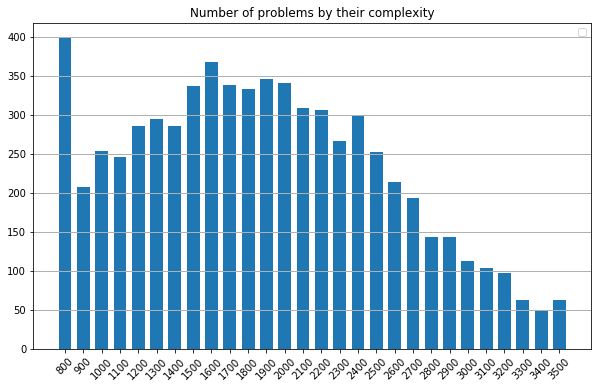

In [21]:
cat_par = a.index
g1 = a['contestId']
width = 0.7
x = np.arange(len(cat_par))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, g1, width)
ax.grid( linestyle='-', linewidth=1,axis='y')
ax.set_title('Number of problems by their complexity')
ax.set_xticks(x)
ax.set_xticklabels(cat_par,rotation = 45)
ax.legend()
# Annotate Text
#for i, cty in enumerate(x,g1):
 #   ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

In [37]:
pr=pd.read_csv('problems_13March2021.cvs')
pr=pr.sort_values('tags')[:-186]
from ast import literal_eval
pr['tags']=pr['tags'].apply(literal_eval)

In [38]:
pr=pr.explode('tags')

In [39]:
pr

,Unnamed: 0,contestId,index,name,type,points,rating,tags
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,*special
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,*special
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,binary search
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,data structures
467,467,1403,A,The Potion of Great Power,PROGRAMMING,NaN,2400.0,*special
...,...,...,...,...,...,...,...,...
6548,6548,46,C,Hamsters and Tigers,PROGRAMMING,NaN,1600.0,two pointers
5880,5880,190,D,Non-Secret Cypher,PROGRAMMING,2000.0,1900.0,two pointers
6010,6010,164,B,Ancient Berland Hieroglyphs,PROGRAMMING,1000.0,2000.0,two pointers
4118,4118,627,E,Orchestra,PROGRAMMING,2500.0,3000.0,two pointers


In [40]:
b=pr.groupby('tags').count().sort_values('contestId')

In [41]:
b

,Unnamed: 0,contestId,index,name,type,points,rating
tags,,,,,,,
schedules,5,5,5,5,5,4,5
chinese remainder theorem,12,12,12,12,12,11,12
2-sat,19,19,19,19,19,13,19
meet-in-the-middle,33,33,33,33,33,25,32
expression parsing,33,33,33,33,33,23,32
ternary search,40,40,40,40,40,29,40
graph matchings,52,52,52,52,52,36,52
fft,55,55,55,55,55,39,55
string suffix structures,69,69,69,69,69,54,69


No handles with labels found to put in legend.


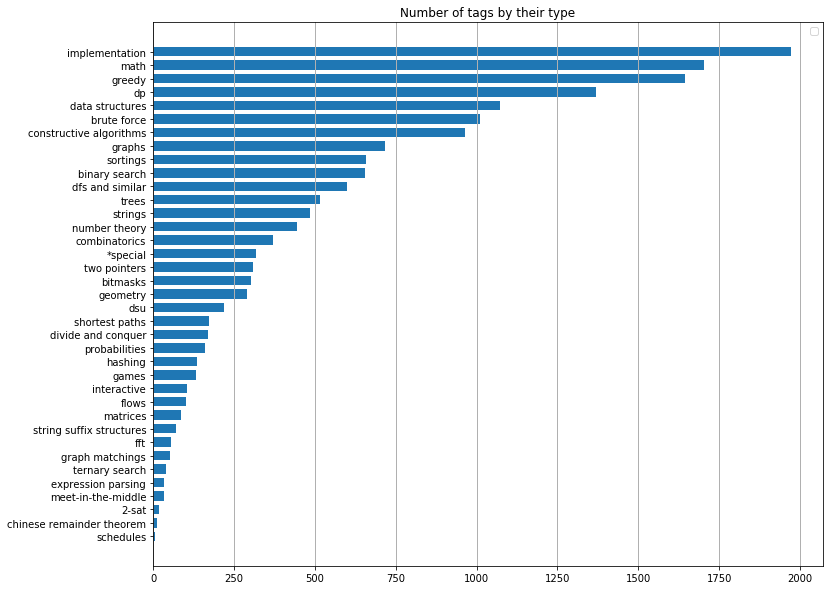

In [42]:
cat_par = b.index
g1 = b['contestId']
width = 0.7
x = np.arange(len(cat_par))
fig, ax = plt.subplots(figsize=(12,10))
rects1 = ax.barh(x, g1, width)
ax.grid( linestyle='-', linewidth=1,axis='x')
ax.set_title('Number of tags by their type')
ax.set_yticks(x)
ax.set_yticklabels(cat_par)
ax.legend()

In [43]:
pr['x']=1
pr

,Unnamed: 0,contestId,index,name,type,points,rating,tags,x
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,*special,1
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,*special,1
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,binary search,1
53,53,1488,F,Dogecoin,PROGRAMMING,NaN,2300.0,data structures,1
467,467,1403,A,The Potion of Great Power,PROGRAMMING,NaN,2400.0,*special,1
...,...,...,...,...,...,...,...,...,...
6548,6548,46,C,Hamsters and Tigers,PROGRAMMING,NaN,1600.0,two pointers,1
5880,5880,190,D,Non-Secret Cypher,PROGRAMMING,2000.0,1900.0,two pointers,1
6010,6010,164,B,Ancient Berland Hieroglyphs,PROGRAMMING,1000.0,2000.0,two pointers,1
4118,4118,627,E,Orchestra,PROGRAMMING,2500.0,3000.0,two pointers,1


In [26]:
pr=pr[pr['rating']>0]
pr['rating']=pr['rating'].astype(int)

C:\Users\papa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
heat=pr.pivot_table('x',index='tags', columns='rating', aggfunc='sum',fill_value=0)

In [28]:
heat.shape


(37, 28)

In [29]:
heat

rating,800,900,1000,1100,1200,1300,1400,1500,1600,1700,...,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500
tags,,,,,,,,,,,,,,,,,,,,,
*special,7,3,5,10,11,10,24,22,26,19,...,2,6,3,6,2,3,1,0,1,0
2-sat,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,2,0,1,0
binary search,2,1,6,15,15,21,21,36,46,50,...,13,20,12,10,10,10,6,8,3,7
bitmasks,2,1,1,3,5,6,8,6,9,15,...,19,16,13,8,7,5,5,3,1,5
brute force,72,35,47,57,58,48,56,70,57,59,...,23,17,13,19,8,6,5,4,1,5
chinese remainder theorem,0,0,1,0,0,0,0,0,0,0,...,0,1,1,2,0,0,0,0,0,1
combinatorics,1,1,2,2,1,16,10,16,17,19,...,21,19,11,17,8,5,5,7,7,3
constructive algorithms,39,16,33,31,52,40,43,51,55,65,...,26,24,22,10,11,13,11,7,4,8
data structures,1,1,3,12,10,16,23,36,41,46,...,48,48,45,32,37,30,28,21,16,15


In [30]:
heat=heat.sort_values(800,ascending=False)

In [34]:
heat

rating,800,900,1000,1100,1200,1300,1400,1500,1600,1700,...,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500
tags,,,,,,,,,,,,,,,,,,,,,
implementation,249,131,137,136,156,149,133,133,114,109,...,14,16,14,11,8,8,6,3,3,2
math,143,69,87,77,73,87,88,90,91,101,...,45,44,33,29,19,26,18,17,16,10
greedy,87,57,61,69,98,89,95,111,111,100,...,30,24,21,19,14,11,8,11,1,5
brute force,72,35,47,57,58,48,56,70,57,59,...,23,17,13,19,8,6,5,4,1,5
constructive algorithms,39,16,33,31,52,40,43,51,55,65,...,26,24,22,10,11,13,11,7,4,8
strings,38,27,26,25,22,27,14,31,23,26,...,14,11,11,6,6,2,7,2,3,5
sortings,27,29,25,29,40,31,43,44,40,38,...,10,6,6,3,7,4,0,2,1,0
number theory,12,9,15,16,19,26,18,22,30,19,...,19,14,7,10,3,6,6,3,7,4
dp,9,7,6,12,20,23,33,51,51,62,...,79,57,43,41,41,24,18,12,13,16


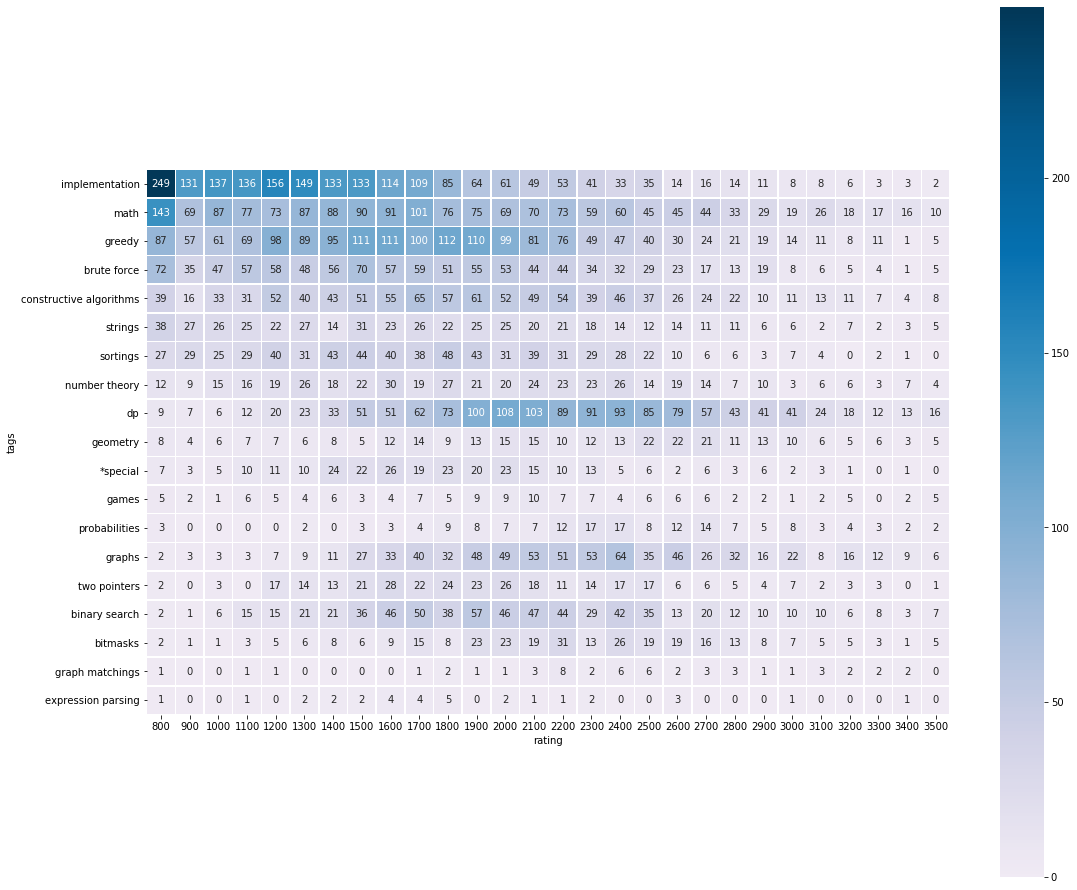

In [44]:
# cmap="YlGn" cmap="PuRd"
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(heat.head(19),annot=True, fmt="d",linewidths=.5,cmap="PuBu", center=110, square=True)

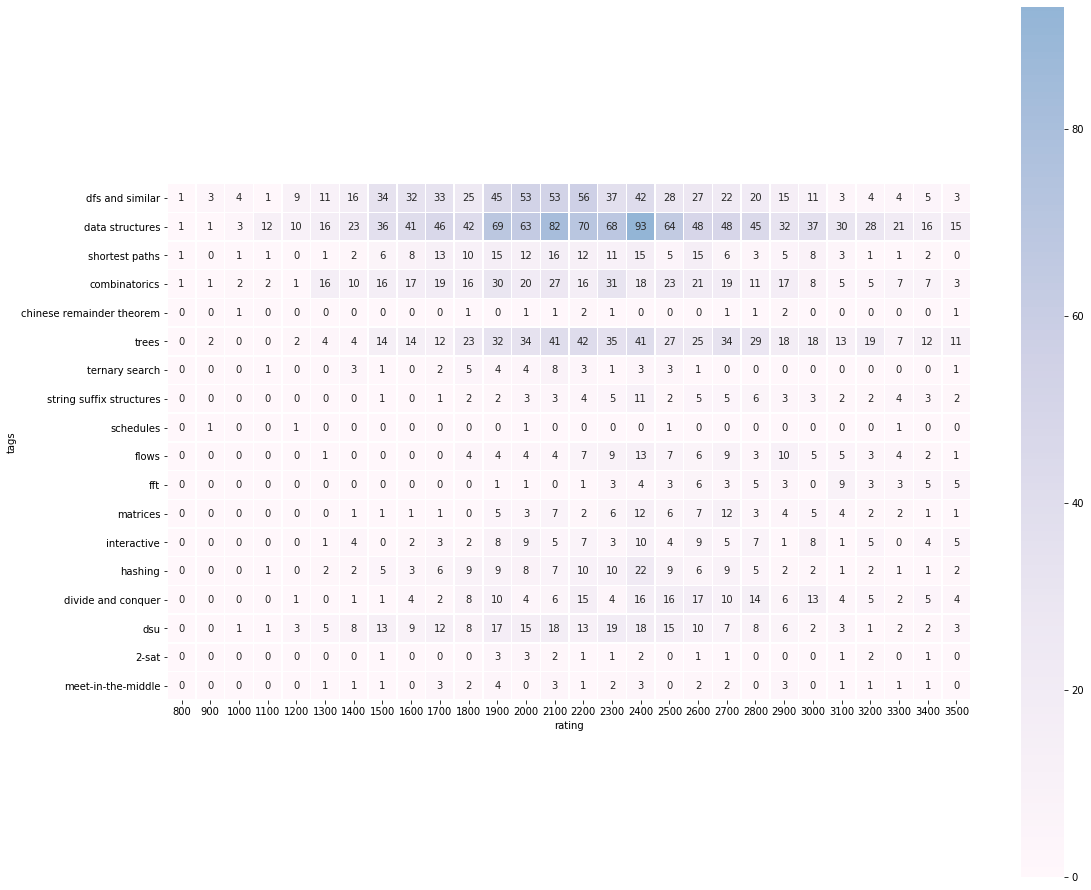

In [46]:
# cmap="YlGn" cmap="PuRd"
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(heat[19:],annot=True, fmt="d",linewidths=.5,cmap="PuBu", center=110, square=True)